In [1]:
!pip install category_encoders

    100% |████████████████████████████████| 61kB 1.9MB/s 


In [176]:
!pip install -U feather-format

    100% |████████████████████████████████| 9.5MB 2.0MB/s 
  Running setup.py bdist_wheel for feather-format ... done
  Stored in directory: /Users/danielleromanoff/Library/Caches/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
Successfully built feather-format


In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

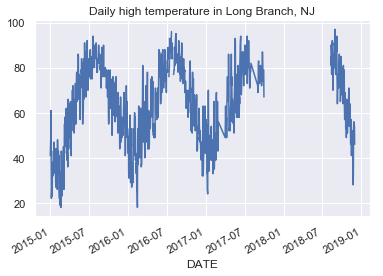

In [147]:
# import weather data for Long Branch, NJ

url = 'https://raw.githubusercontent.com/DanielleRomanoff/DS-Unit-2-Sprint-4-Model-Validation/master/module-1-begin-modeling-process/Weather_LongBranch_NJ.csv'
weather = pd.read_csv(url, parse_dates = ['DATE']).set_index('DATE')
weather['2015': '2018'].TMAX.plot()
plt.title('Daily high temperature in Long Branch, NJ');

In [148]:
# drop Station column - not useful and drop NaN's

weather = weather.drop('STATION', axis = 1)
weather.dropna(inplace = True)
weather.head()

,LATITUDE,LONGITUDE,ELEVATION,TMAX,TMIN,TOBS
DATE,,,,,,
2015-01-01,40.29696,-74.00153,9.1,41.0,22.0,31.0
2015-01-02,40.29696,-74.00153,9.1,44.0,26.0,37.0
2015-01-03,40.29696,-74.00153,9.1,48.0,31.0,48.0
2015-01-04,40.29696,-74.00153,9.1,61.0,40.0,40.0
2015-01-05,40.29696,-74.00153,9.1,40.0,19.0,20.0


In [149]:
# get the mean of the TMAX values

weather.TMAX.mean()

63.971014492753625

In [150]:
weather['TMAX_yesterday'] = weather.TMAX.shift(1)
weather.dropna(inplace = True) # Drops the first date because it doesn't have a 'yesterday'
print(mean_absolute_error(weather.TMAX, weather.TMAX_yesterday))
weather.head()

6.144100580270793


,LATITUDE,LONGITUDE,ELEVATION,TMAX,TMIN,TOBS,TMAX_yesterday
DATE,,,,,,,
2015-01-02,40.29696,-74.00153,9.1,44.0,26.0,37.0,41.0
2015-01-03,40.29696,-74.00153,9.1,48.0,31.0,48.0,44.0
2015-01-04,40.29696,-74.00153,9.1,61.0,40.0,40.0,48.0
2015-01-05,40.29696,-74.00153,9.1,40.0,19.0,20.0,61.0
2015-01-06,40.29696,-74.00153,9.1,22.0,17.0,18.0,40.0


In [151]:
# get the mean absolute weather
predicted = [weather.TMAX.mean()] * len(weather)
mean_absolute_error(weather.TMAX, predicted)

14.417246875105223

In [152]:
# Assigning values
X = weather.drop(columns = 'TMAX_yesterday')
y = weather.TMAX_yesterday

In [153]:
# divide the dataframe into train and test data
# splitting data
train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state = 42, shuffle = True)
                                                                
# print datasets' shapes
print('X_train shape is ', X_train.shape)
# print('X_validate shape is ', X_validate.shape)
print('X_test shape is ', X_test.shape)
print()
print('y_train shape is ', y_train.shape)
# print('y_validate shape is ', X_validate.shape)
print('y_test shape is ', y_test.shape)                                                       

X_train shape is  (919, 6)
X_test shape is  (104, 6)

y_train shape is  (919,)
y_test shape is  (104,)


In [154]:
print(np.mean(y_train))
y_pred = [np.mean(y_train)] * len(y_test)

63.855277475516864


/Users/danielleromanoff/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


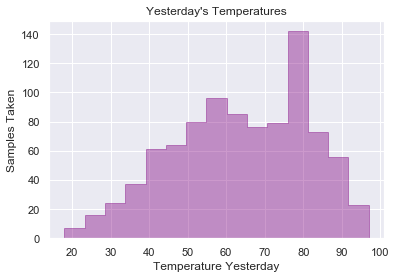

In [155]:
sns.set();
ax = plt.subplots()
ax = sns.distplot(y_train, kde = False, hist_kws = {'histtype': 'step', 'fill': True, 'linewidth': 1, 'color': 'purple'})
ax.set_xlabel('Temperature Yesterday')
ax.set_ylabel('Samples Taken')
plt.title("Yesterday's Temperatures");

In [156]:
# Logistic Regression using the training data only
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.0673076923076923

In [157]:
# Scaling the data improves accuracy
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver = 'lbfgs'))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.08653846153846154

In [158]:
# One Hot Encoding using the training data
# Test accuracy does not improve.
pipeline = make_pipeline(ce.OneHotEncoder(use_cat_names = True), StandardScaler(), LogisticRegression(solver = 'lbfgs'))
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.08653846153846154

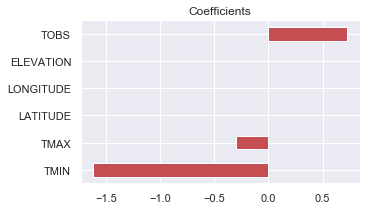

In [165]:
# Visualizing the coefficients
plt.figure(figsize = (5, 3))
plt.title('Coefficients')

coefficients = pipeline.named_steps['logisticregression'].coef_[0]
feature_names = pipeline.named_steps['onehotencoder'].transform(X_train).columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color = 'r');

In [170]:
# cross validation returning 10 scores
scores = cross_val_score(pipeline, X_train, y_train, scoring = 'accuracy', cv = 10)

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the 

In [171]:
scores

array([0.05426357, 0.05982906, 0.05660377, 0.04854369, 0.06315789,
       0.08888889, 0.03658537, 0.06849315, 0.10606061, 0.06896552])

In [172]:
scores.mean(), scores.std()

(0.0651391512092133, 0.01891689029625541)

In [174]:
# splitting training data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, test_size = 0.2, random_state = 42, shuffle = True)

# print datasets' shapes
print('X_train shape is ', X_train.shape)
# print('X_validate shape is ', X_validate.shape)
print('X_val shape is ', X_val.shape)
print()
print('y_train shape is ', y_train.shape)
# print('y_validate shape is ', X_validate.shape)
print('y_val shape is ', y_val.shape)       

X_train shape is  (735, 6)
X_val shape is  (184, 6)

y_train shape is  (735,)
y_val shape is  (184,)


In [175]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
accuracy_score(y_val, y_pred)

/Users/danielleromanoff/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.08152173913043478

---

In [177]:
# Saving test data for later
# X_test.reset_index(drop = True).to_feather('X_test.feather')
# pd.DataFrame(y_test).reset_index(drop = True).to_feather('y_test.feather')

# Saving files from Google Colab to my local maching
# from google.colab import files
# files.download('X_test.feather')
# files.download('y_test.feather')

# They can then be deleted from my notebook's runtime
# del X_test, y_test

---

In [ ]:
# Iris dataset

# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data
# y = iris.target

In [ ]:
# def train_validation_test_split(
#     X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
#     random_state=None, shuffle=True):
        
#     assert train_size + val_size + test_size == 1
    
#     X_train_val, X_test, y_train_val, y_test = train_test_split(
#         X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
#     X_train, X_val, y_train, y_val = train_test_split(
#         X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
#         random_state=random_state, shuffle=shuffle)
    
#     return X_train, X_val, X_test, y_train, y_val, y_test

# Sometimes you must shuffle. Here is a good example
# X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
#     X, y, shuffle=True)